<a href="https://colab.research.google.com/github/jordan-dsouza/HorrorMovieAnalysis/blob/main/HorrorMovieAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Horror Movies IMDb.csv")
df.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,"9,05,275",$78.90M
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,"6,89,068",$32.00M
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,"10,51,582",$44.02M
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,"4,39,793",$13.78M
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,"53,297",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie Title  836 non-null    object 
 1   Movie Year   836 non-null    int64  
 2   Runtime      836 non-null    int64  
 3   Genre        836 non-null    object 
 4   Rating       836 non-null    float64
 5   Director     836 non-null    object 
 6   Votes        836 non-null    object 
 7   Gross        637 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 52.4+ KB


In [4]:
#Mean rating is 6.16 while runtime is about 101 minutes.
df.describe()

,Movie Year,Runtime,Rating
count,836.000000,836.000000,836.000000
mean,2004.271531,100.767943,6.160167
std,16.330837,14.484556,0.940355
min,1920.000000,57.000000,1.600000
25%,1998.000000,91.000000,5.600000
50%,2009.000000,98.000000,6.200000
75%,2016.000000,108.000000,6.800000
max,2023.000000,191.000000,8.500000


In [5]:
df["Votes"] = df["Votes"].str.replace(',','')#Remove commas.
df["Gross"] = df["Gross"].str.replace('$','')#Remove $ sign.
df["Gross"] = df["Gross"].str.replace('M', 'e6').str.replace('B', 'e9')#Replacing M with e6 and B with e9.
df["Gross"] = pd.to_numeric(df["Gross"], errors="coerce")#"coerce" - If values cannot be changed, set to NaN.

<ipython-input-5-bf9593d642e1>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Gross"] = df["Gross"].str.replace('$','')#Remove $ sign.


In [6]:
#For NaN values, filling NaN with mean value:
df["Gross"] = df["Gross"].fillna(df["Gross"].mean())
df.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
0,Alien,1979,117,"Horror, Sci-Fi",8.5,Ridley Scott,905275,7.890000e+07
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,689068,3.200000e+07
2,The Shining,1980,146,"Drama, Horror",8.4,Stanley Kubrick,1051582,4.402000e+07
3,The Thing,1982,109,"Horror, Mystery, Sci-Fi",8.2,John Carpenter,439793,1.378000e+07
4,Tumbbad,2018,104,"Drama, Fantasy, Horror",8.2,Rahi Anil Barve,53297,3.435234e+07


In [7]:
#Number of genres:
count = df["Genre"].value_counts()
print(count)

Horror, Mystery, Thriller    98
Horror, Thriller             81
Drama, Horror, Mystery       71
Horror                       50
Drama, Fantasy, Horror       36
                             ..
Animation, Comedy, Drama      1
Drama, Horror, Western        1
Horror, Mystery, Romance      1
Animation, Action, Drama      1
Action, Horror, War           1
Name: Genre, Length: 79, dtype: int64


In [8]:
#Horror, Mystery, Thriller.
hmt_df=df[df["Genre"] == "Horror, Mystery, Thriller"]
hmt_df.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
1,Psycho,1960,109,"Horror, Mystery, Thriller",8.5,Alfred Hitchcock,689068,3.200000e+07
9,The Cabinet of Dr. Caligari,1920,67,"Horror, Mystery, Thriller",8.0,Robert Wiene,66749,3.435234e+07
15,Get Out I,2017,104,"Horror, Mystery, Thriller",7.8,Jordan Peele,642604,1.760400e+08
28,Saw,2004,103,"Horror, Mystery, Thriller",7.6,James Wan,436144,5.600000e+07
34,The Others,2001,104,"Horror, Mystery, Thriller",7.6,Alejandro Amenábar,377287,9.652000e+07


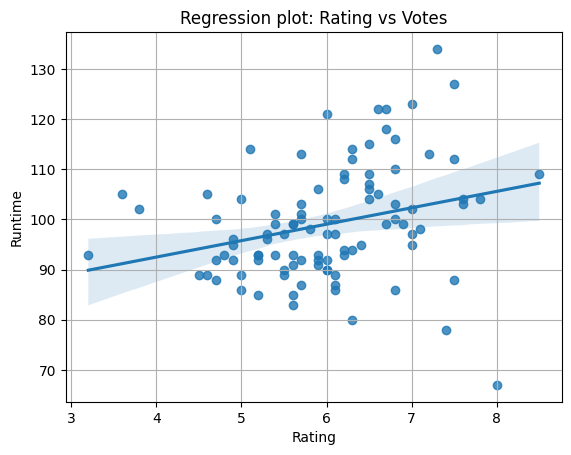

Most movies with high runtime have high ratings in the 'horror, mystery, thriller' genre.


In [23]:
plt.title("Regression plot: Rating vs Votes")
sns.regplot(data = hmt_df, x = "Rating", y = "Runtime")
plt.grid()
plt.show()#Weak positive correlation
print("Most movies with high runtime have high ratings in the 'horror, mystery, thriller' genre.")

In [17]:
#Runtimes:
long_df = df.nlargest(10, "Runtime")
short_df = df.nsmallest(10, "Runtime")

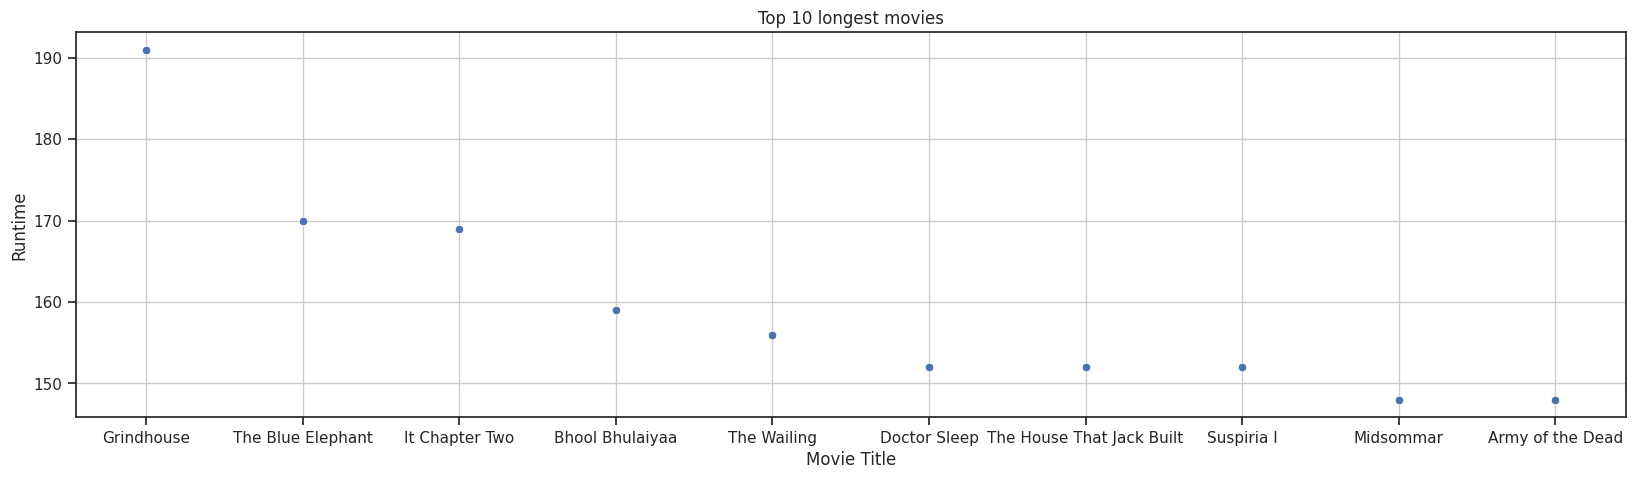

In [29]:
plt.figure(figsize = (20, 5))
sns.scatterplot(data=long_df, y = "Runtime", x = "Movie Title")
sns.set(style="ticks")
plt.title("Top 10 longest movies")
plt.grid()
plt.show()

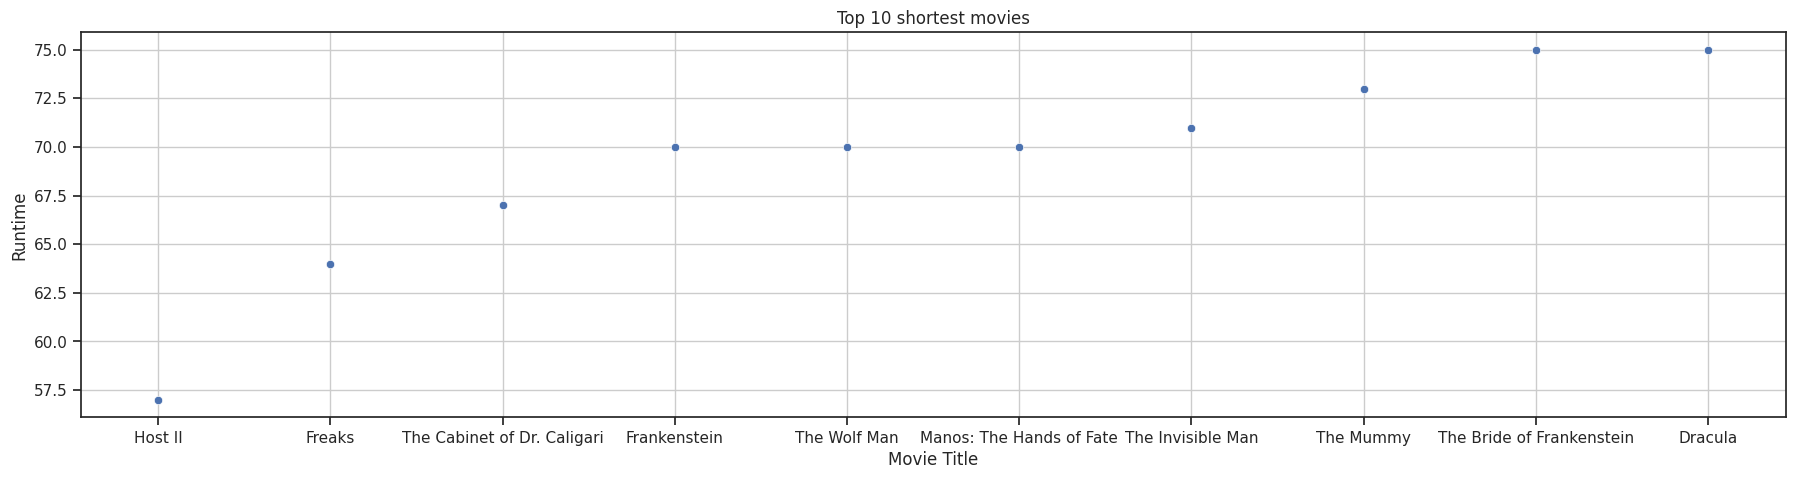

In [34]:
plt.figure(figsize = (22, 5))
sns.scatterplot(data=short_df, x = "Movie Title", y = "Runtime")
sns.set(style="ticks")
plt.title("Top 10 shortest movies")
plt.grid()
plt.show()

In [37]:
#Highest and lowest rating:
H_rate = df.nlargest(5, "Rating")
L_rate = df.nsmallest(5, "Rating")

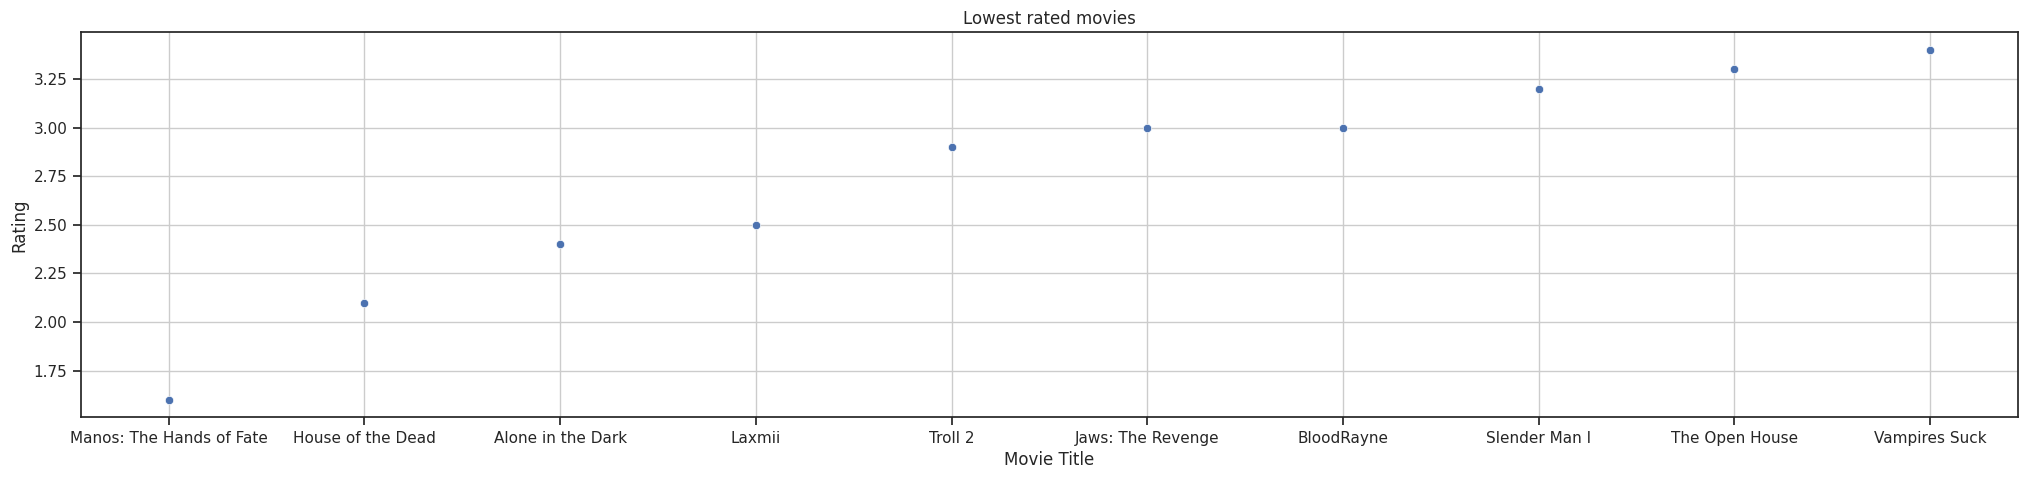

In [44]:
plt.figure(figsize = (25, 5))
plt.title("Lowest rated movies")
sns.scatterplot(data = L_rate, x = "Movie Title", y = "Rating")
plt.grid()
plt.show()

In [48]:
HGross = df.nlargest(5, "Gross")
HGross.head()

,Movie Title,Movie Year,Runtime,Genre,Rating,Director,Votes,Gross
165,Doctor Strange in the Multiverse of Madness,2022,126,"Action, Adventure, Fantasy",6.9,Sam Raimi,440936,411330000.0
76,It I,2017,135,Horror,7.3,Andy Muschietti,571035,327480000.0
101,I Am Legend,2007,101,"Action, Drama, Horror",7.2,Francis Lawrence,781259,256390000.0
5,The Exorcist,1973,122,Horror,8.1,William Friedkin,422330,232910000.0
289,It Chapter Two,2019,169,"Drama, Fantasy, Horror",6.5,Andy Muschietti,281137,211590000.0


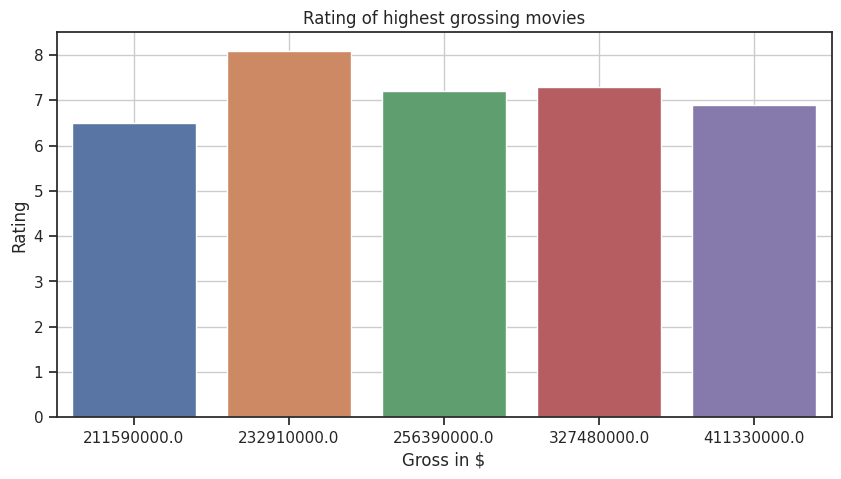

In [60]:
plt.figure(figsize = (10, 5))
sns.barplot(data = HGross, x = "Gross", y = "Rating")
plt.grid()
plt.title("Rating of highest grossing movies")
plt.xlabel("Gross in $")
plt.show()